# **Práctica 3: Análisis exploratorio de datos**

Nombre: Casasola García Oscar

No. Cuenta: 316123747

Email: oscar.casasola.g7@gmail.com

### **Contexto**

Yahoo Finance ofrece una amplia variedad de datos de mercado sobre acciones, bonos, divisas y criptomonedas. También proporciona informes de noticias con varios puntos de vista sobre diferentes mercados de todo el mundo, todos accesibles a través de la biblioteca yfinance.

**Objetivo:** Hacer un análisis exploratorio de datos con base en información obtenida de Yahoo Finanzas. Por ejemplo, datos de Spotify, Facebook, Amazon y Aeromexico.

**Fuente de datos**

De Yahoo Finanzas se utiliza el Ticker -Etiqueta de cotización- de la acción bursatil.

### **Importar las bibliotecas y los datos**

In [1]:
%pip install yfinance
#!pip install googlefinance

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline             
# Para generar y almacenar los gráficos dentro del cuaderno
import yfinance as yf

In [2]:
# Para Spotify
DataSpotify = yf.Ticker('SPOT')
DataSpotify

yfinance.Ticker object <SPOT>

In [3]:
SpotifyHist = DataSpotify.history(start = '2019-1-1', end = '2022-9-6', interval = '1d')
SpotifyHist

ConnectionError: HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Max retries exceeded with url: /v8/finance/chart/SPOT?period1=1546322400&period2=1662440400&interval=1d&includePrePost=False&events=div%2Csplits (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x000001390999F7C0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

Descripción:

* En el comercio de acciones, 'alto' y 'bajo' se refieren a los precios máximos y mínimos en un período determinado.
* 'Apertura' y 'cierre' son los precios en los que una acción comenzó y terminó cotizando en el mismo período. 
* El 'volumen' es la cantidad total de la actividad comercial. 
* Los valores ajustados tienen en cuenta las acciones corporativas, como los 'dividendos', la 'división de acciones' y la emisión de nuevas acciones.

In [5]:
SpotifyHist.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,111.660004,115.629997,110.360001,113.739998,861100,0,0
2019-01-03,112.080002,113.345001,108.589996,109.019997,1082300,0,0
2019-01-04,112.059998,121.470001,111.500000,118.510002,2484800,0,0
2019-01-07,115.040001,123.865997,113.279999,119.360001,2516200,0,0
2019-01-08,121.440002,122.769997,114.699997,117.480003,1257100,0,0
2019-01-09,118.599998,124.379997,118.161003,122.690002,1276700,0,0
2019-01-10,122.349998,124.970001,119.589996,123.930000,1347100,0,0
2019-01-11,123.000000,124.360001,118.290001,120.519997,1414400,0,0
2019-01-14,120.199997,128.000000,118.570000,126.709999,2474200,0,0


### **Paso 1: Descripción de la estructura de los datos**

1) Forma (dimensiones) del DataFrame

El atributo .shape de Pandas proporciona una estructura general de los datos. Devuelve la cantidad de filas y columnas que tiene el conjunto de datos.

In [6]:
SpotifyHist.shape

(926, 7)

2) Tipos de datos (variables)

El atributo .dtypes muestra los tipos de datos de las columnas (variables y tipos).

In [8]:
SpotifyHist.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends         int64
Stock Splits      int64
dtype: object

Se observa que los datos son numéricos (flotante y entero).

### **Paso 2: Identificación de datos faltantes**

Una función útil de pandas es **.isnull().sum()** que regresa la suma de todos los valores nulos en cada variable.

In [9]:
SpotifyHist.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

También se puede usar **info()** para obtener el tipo de datos y la suma de valores nulos.

In [10]:
SpotifyHist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 926 entries, 2019-01-02 to 2022-09-02
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          926 non-null    float64
 1   High          926 non-null    float64
 2   Low           926 non-null    float64
 3   Close         926 non-null    float64
 4   Volume        926 non-null    int64  
 5   Dividends     926 non-null    int64  
 6   Stock Splits  926 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 57.9 KB


### **Paso 3: Detección de valores atípicos**

Se pueden utilizar gráficos para tener una idea general de las distribuciones de los datos, y se sacan estadísticas para resumir los datos. Estas dos estrategias son recomendables y se complementan.

La distribución se refiere a cómo se distribuyen los valores en una variable o con qué frecuencia ocurren.

Para las variables numéricas, se observa cuántas veces aparecen grupos de números en una columna. Mientras que para las variables categóricas, son las clases de cada columna y su frecuencia.

**1) Distribución de variables numéricas**

* Se utilizan histogramas que agrupan los números en rangos.
* La altura de una barra muestra cuántos números caen en ese rango. 
* Se emplea **hist()** para trazar el histograma de las variables numéricas. También se pueden usar los parámetros: **figsize** y **xrot** para aumentar el tamaño de la cuadrícula y rotar el eje x 45 grados.

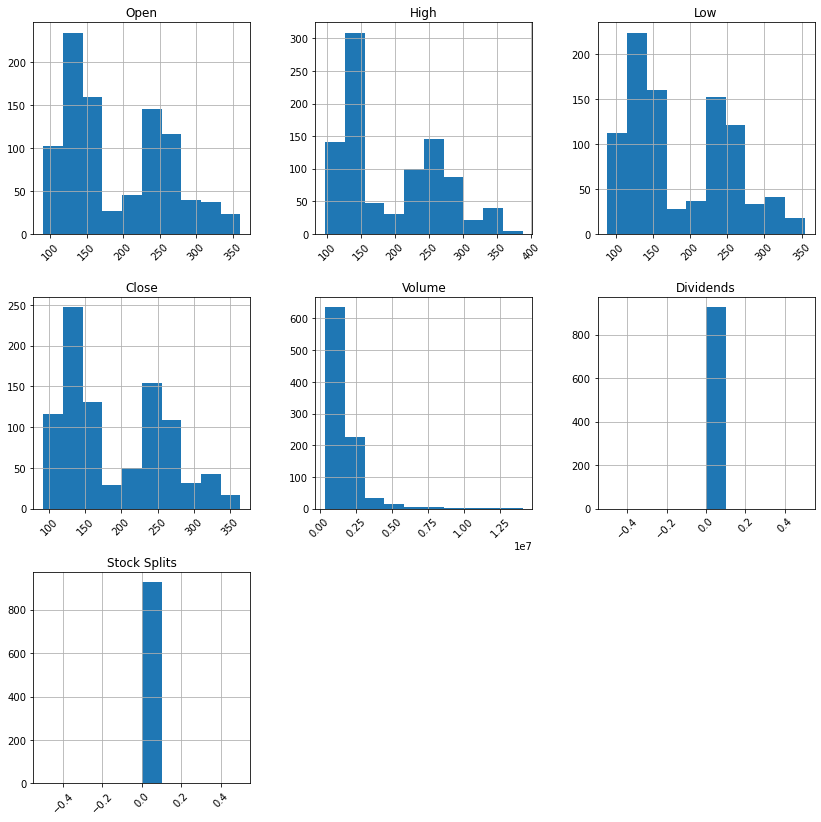

In [11]:
SpotifyHist.hist(figsize=(14,14), xrot=45)
plt.show()

**Qué buscar:**

* Posibles valores atípicos, que pueden ser errores de medición.
* Límites que no tienen sentido, como valores porcentuales > 100.

En el histograma se observa que **Volume** tiene valores sesgados a la izquierda. Las variables **Dividens** y **Stock Splits** presentan valores en 'cero'.

**2) Resumen estadístico de variables numéricas**

Se sacan estadísticas usando **describe()** que muestra un resumen estadístico de las variables numéricas.

In [12]:
SpotifyHist.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,926.000000,926.000000,926.000000,926.000000,9.260000e+02,926.0,926.0
mean,191.837408,195.800918,187.823677,191.856620,1.740220e+06,0.0,0.0
std,68.522499,69.960136,66.931007,68.428768,1.318591e+06,0.0,0.0
min,90.440002,97.070000,89.029999,91.940002,3.945000e+05,0.0,0.0
25%,136.582497,139.794994,134.344997,137.260006,1.051575e+06,0.0,0.0
50%,153.875000,156.955002,151.032501,154.459999,1.385450e+06,0.0,0.0
75%,249.799995,254.610001,245.392498,249.770000,1.989075e+06,0.0,0.0
max,360.910004,387.440002,354.178009,364.589996,1.404930e+07,0.0,0.0


* Se incluye un recuento, media, desviación, valor mínimo, valor máximo, percentil inferior (25%), 50% y percentil superior (75%).
* Por defecto, el percentil 50 es lo mismo que la mediana.
* Se observa que para cada variable, el recuento también ayuda a identificar variables con valores nulos o vacios. Estos son: **Dividends** y **Stock Splits**.

**3) Diagramas para detectar posibles valores atípicos**

Para este tipo de gráficos se utiliza **Seaborn**, que permite generar diagramas de cajas para detectar valores atípicos.

c:\Users\johnc\anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


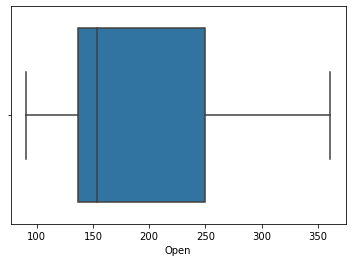

c:\Users\johnc\anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


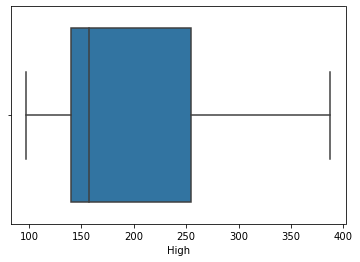

c:\Users\johnc\anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


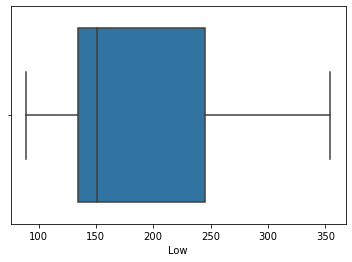

c:\Users\johnc\anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


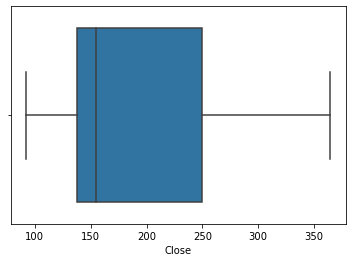

c:\Users\johnc\anaconda3\envs\IA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


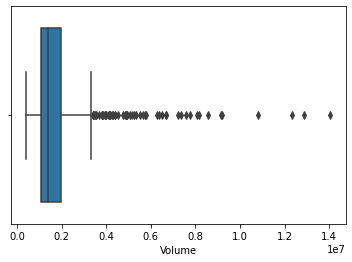

In [13]:
VariablesValoresAtipicos = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in VariablesValoresAtipicos:
  sns.boxplot(col, data=SpotifyHist)
  plt.show()

Se observa que en Volume se tienen valores atípicos que están lejos de los otros valores.

**3. Plot**

* Para este tipo de gráficos se utiliza Seaborn, que permite generar un histograma para variables categóricas. Cada barra en el gráfico de conteo representa una clase.
* Se crea un bucle para el conteo y distribución de las clases. La sentencia select_dtypes(include = ’object’) selecciona las columnas categóricas con sus valores y las muestra.
* Se incluye también If para elegir solo las tres columnas con 10 o menos clases usando series.**nunique() < 10**.


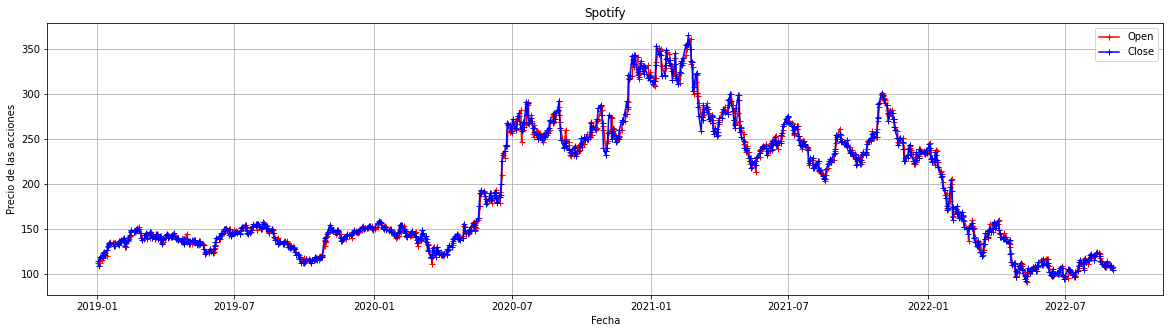

In [14]:
plt.figure(figsize=(20, 5))
plt.plot(SpotifyHist['Open'], color='red', marker='+', label='Open')
plt.plot(SpotifyHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Spotify')
plt.grid(True)
plt.legend()
plt.show()

### **Paso 4: Identificación de relaciones entre pares variables**

Una matriz de correlaciones es útil para analizar la relación entre las variables numéricas.
Se emplea la función corr()

In [15]:
SpotifyHist.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.998366,0.998509,0.996610,-0.028911,NaN,NaN
High,0.998366,1.000000,0.998179,0.998530,-0.006329,NaN,NaN
Low,0.998509,0.998179,1.000000,0.998472,-0.038467,NaN,NaN
Close,0.996610,0.998530,0.998472,1.000000,-0.019512,NaN,NaN
Volume,-0.028911,-0.006329,-0.038467,-0.019512,1.000000,NaN,NaN
Dividends,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock Splits,NaN,NaN,NaN,NaN,NaN,NaN,NaN


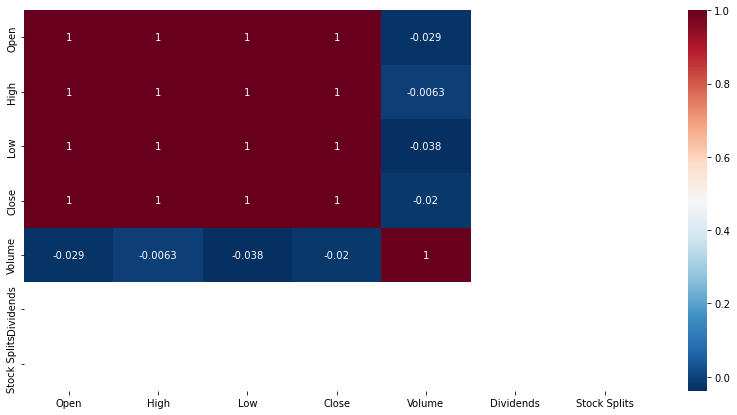

In [16]:
plt.figure(figsize=(14,7))
sns.heatmap(SpotifyHist.corr(), cmap='RdBu_r', annot=True)
plt.show()

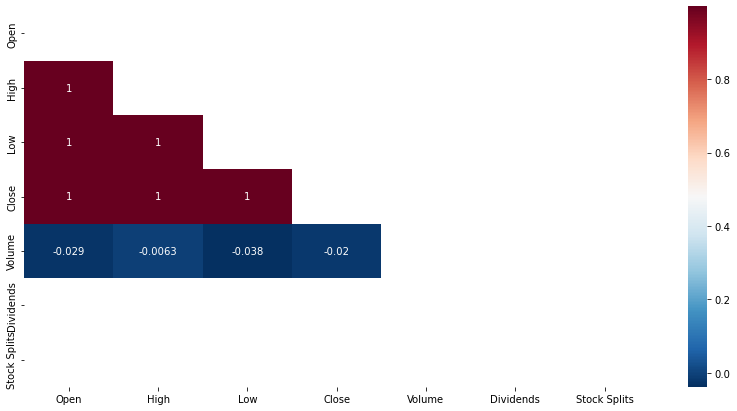

In [17]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(SpotifyHist.corr())
sns.heatmap(SpotifyHist.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

* Una correlación es un valor entre -1 y 1 que equivale a qué tan cerca se mueven simultáneamente los valores de dos variables. 
* Una correlación positiva significa que a medida que una característica aumenta, la otra también aumenta.
* Una correlación negativa significa que a medida que una característica disminuye, la otra también disminuye. 
* Las correlaciones cercanas a 0 indican una relación débil, mientras que las más cercanas a -1 o 1 significan una relación fuerte.


### Se incluyen otras fuentes de datos

In [18]:
# Para Facebook
DataFacebook = yf.Ticker('META')

In [19]:
FacebookHist = DataFacebook.history(start = '2019-1-1', end = '2022-9-6', interval='1d')
FacebookHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,128.990005,137.509995,128.559998,135.679993,28146200,0,0
2019-01-03,134.690002,137.169998,131.119995,131.740005,22717900,0,0
2019-01-04,134.009995,138.000000,133.750000,137.949997,29002100,0,0
2019-01-07,137.559998,138.869995,135.910004,138.050003,20089300,0,0
2019-01-08,139.889999,143.139999,139.539993,142.529999,26263800,0,0
...,...,...,...,...,...,...,...
2022-08-29,160.660004,163.050003,159.009995,159.169998,20052700,0,0
2022-08-30,160.350006,161.660004,155.910004,157.160004,19567900,0,0
2022-08-31,167.070007,167.839996,162.139999,162.929993,40953000,0,0


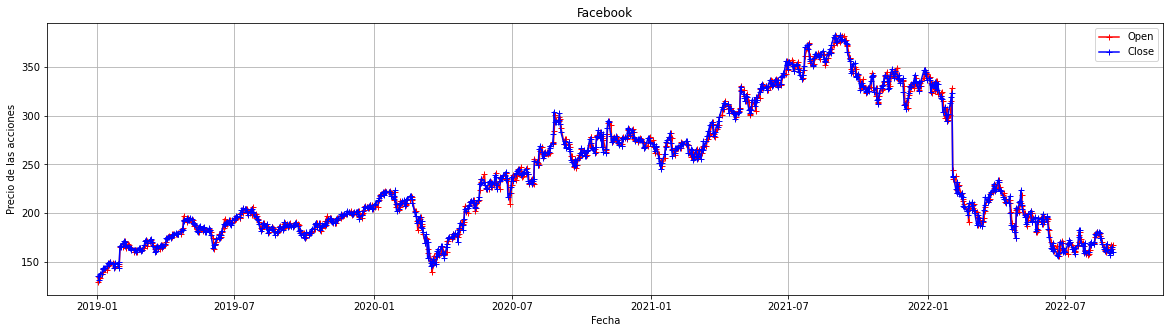

In [20]:
plt.figure(figsize=(20, 5))
plt.plot(FacebookHist['Open'], color='red', marker='+', label='Open')
plt.plot(FacebookHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Facebook')
plt.grid(True)
plt.legend()
plt.show()

In [21]:
# Para Amazon
DataAmazon = yf.Ticker('AMZN')

In [22]:
AmazonHist = DataAmazon.history(start = '2019-1-1', end = '2022-9-6', interval='1d')
AmazonHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,73.260002,77.667999,73.046501,76.956497,159662000,0,0.0
2019-01-03,76.000504,76.900002,74.855499,75.014000,139512000,0,0.0
2019-01-04,76.500000,79.699997,75.915497,78.769501,183652000,0,0.0
2019-01-07,80.115501,81.727997,79.459503,81.475502,159864000,0,0.0
2019-01-08,83.234497,83.830498,80.830498,82.829002,177628000,0,0.0
...,...,...,...,...,...,...,...
2022-08-29,129.899994,131.949997,128.770004,129.789993,48101600,0,0.0
2022-08-30,131.250000,132.070007,126.849998,128.729996,49203000,0,0.0
2022-08-31,129.449997,130.589996,126.739998,126.769997,53648700,0,0.0


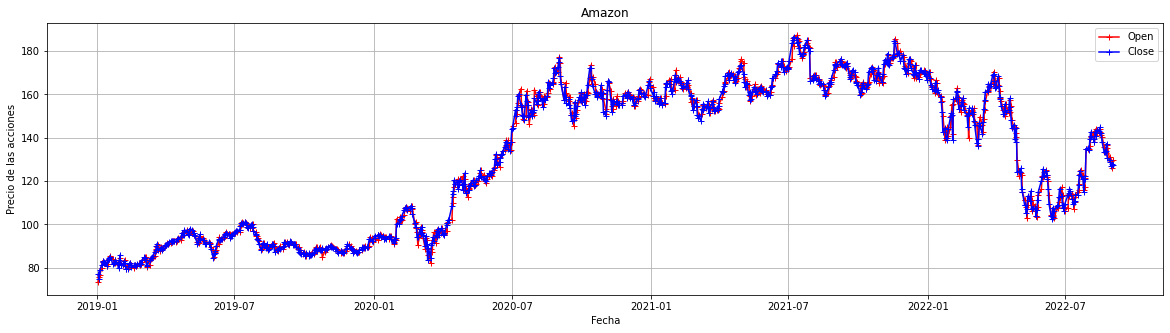

In [23]:
plt.figure(figsize=(20, 5))
plt.plot(AmazonHist['Open'], color='red', marker='+', label='Open')
plt.plot(AmazonHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Amazon')
plt.grid(True)
plt.legend()
plt.show()

In [24]:
# Para Aeroméxico
DataAeromex = yf.Ticker('AEROMEX.MX')

In [25]:
AeromexHist = DataAeromex.history(start = '2019-1-1', end = '2022-9-6', interval='1d')
AeromexHist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,22.000000,23.080000,22.000000,22.530001,54890,0,0
2019-01-03,22.500000,23.049999,22.500000,22.770000,88098,0,0
2019-01-04,23.430000,23.840000,22.780001,23.160000,69569,0,0
2019-01-07,23.180000,24.500000,23.100000,23.270000,160120,0,0
2019-01-08,23.219999,23.870001,22.820000,23.230000,190421,0,0
...,...,...,...,...,...,...,...
2022-08-30,194.809998,194.809998,194.809998,194.809998,0,0,0
2022-08-31,195.509995,199.990005,195.000000,198.979996,789,0,0
2022-09-01,198.979996,198.979996,198.979996,198.979996,0,0,0


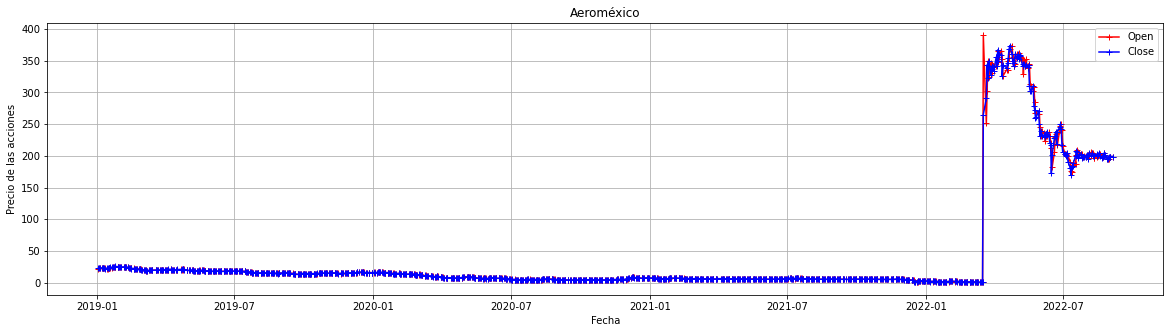

In [26]:
plt.figure(figsize=(20, 5))
plt.plot(AeromexHist['Open'], color='red', marker='+', label='Open')
plt.plot(AeromexHist['Close'], color='blue', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Aeroméxico')
plt.grid(True)
plt.legend()
plt.show()

### Integración

In [27]:
SpotifyClose = SpotifyHist.drop(columns = ['Open', 'High', 'Low', 'Volume', 
                                        'Dividends', 'Stock Splits'])
SpotifyClose.rename(columns = {'Close': 'Spotify'}, inplace = True)
SpotifyClose

,Spotify
Date,
2019-01-02,113.739998
2019-01-03,109.019997
2019-01-04,118.510002
2019-01-07,119.360001
2019-01-08,117.480003
...,...
2022-08-29,108.559998
2022-08-30,107.230003
2022-08-31,108.150002


In [28]:
FacebookClose = FacebookHist.drop(columns = ['Open', 'High', 'Low', 'Volume', 
                                        'Dividends', 'Stock Splits'])
FacebookClose.rename(columns = {'Close': 'Facebook'}, inplace = True)
FacebookClose

,Facebook
Date,
2019-01-02,135.679993
2019-01-03,131.740005
2019-01-04,137.949997
2019-01-07,138.050003
2019-01-08,142.529999
...,...
2022-08-29,159.169998
2022-08-30,157.160004
2022-08-31,162.929993


In [29]:
AmazonClose = AmazonHist.drop(columns = ['Open', 'High', 'Low', 'Volume', 
                                        'Dividends', 'Stock Splits'])
AmazonClose.rename(columns = {'Close': 'Amazon'}, inplace = True)
AmazonClose

,Amazon
Date,
2019-01-02,76.956497
2019-01-03,75.014000
2019-01-04,78.769501
2019-01-07,81.475502
2019-01-08,82.829002
...,...
2022-08-29,129.789993
2022-08-30,128.729996
2022-08-31,126.769997


In [30]:
AeromexClose = AeromexHist.drop(columns = ['Open', 'High', 'Low', 'Volume', 
                                        'Dividends', 'Stock Splits'])
AeromexClose.rename(columns = {'Close': 'Aeromexico'}, inplace = True)
AeromexClose

,Aeromexico
Date,
2019-01-02,22.530001
2019-01-03,22.770000
2019-01-04,23.160000
2019-01-07,23.270000
2019-01-08,23.230000
...,...
2022-08-30,194.809998
2022-08-31,198.979996
2022-09-01,198.979996


In [31]:
# Se integran los cierres del precio de las acciones
Acciones = pd.concat([SpotifyClose, FacebookClose, AmazonClose, AeromexClose], 
                      axis = 'columns', join = 'inner')
Acciones

,Spotify,Facebook,Amazon,Aeromexico
Date,,,,
2019-01-02,113.739998,135.679993,76.956497,22.530001
2019-01-03,109.019997,131.740005,75.014000,22.770000
2019-01-04,118.510002,137.949997,78.769501,23.160000
2019-01-07,119.360001,138.050003,81.475502,23.270000
2019-01-08,117.480003,142.529999,82.829002,23.230000
...,...,...,...,...
2022-08-29,108.559998,159.169998,129.789993,194.809998
2022-08-30,107.230003,157.160004,128.729996,194.809998
2022-08-31,108.150002,162.929993,126.769997,198.979996


In [32]:
# En caso de tener valores nulos
AccionesNN = Acciones.dropna()
AccionesNN

,Spotify,Facebook,Amazon,Aeromexico
Date,,,,
2019-01-02,113.739998,135.679993,76.956497,22.530001
2019-01-03,109.019997,131.740005,75.014000,22.770000
2019-01-04,118.510002,137.949997,78.769501,23.160000
2019-01-07,119.360001,138.050003,81.475502,23.270000
2019-01-08,117.480003,142.529999,82.829002,23.230000
...,...,...,...,...
2022-08-29,108.559998,159.169998,129.789993,194.809998
2022-08-30,107.230003,157.160004,128.729996,194.809998
2022-08-31,108.150002,162.929993,126.769997,198.979996


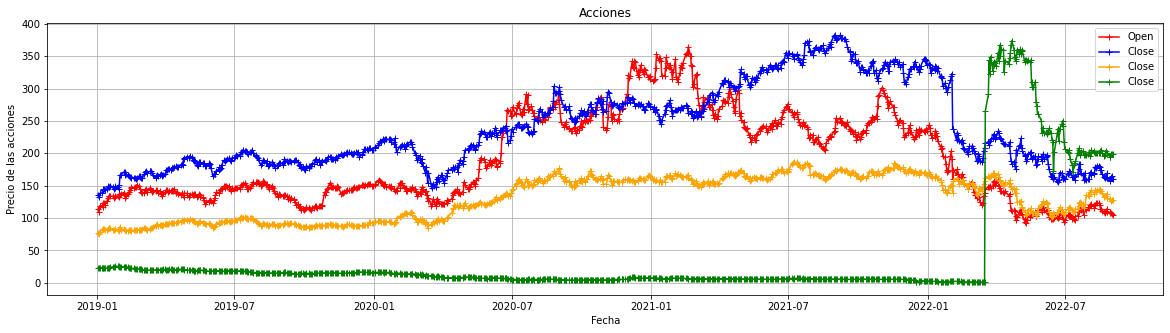

In [33]:
plt.figure(figsize=(20, 5))
plt.plot(Acciones['Spotify'], color='red', marker='+', label='Open')
plt.plot(Acciones['Facebook'], color='blue', marker='+', label='Close')
plt.plot(Acciones['Amazon'], color='orange', marker='+', label='Close')
plt.plot(Acciones['Aeromexico'], color='green', marker='+', label='Close')
plt.xlabel('Fecha')
plt.ylabel('Precio de las acciones')
plt.title('Acciones')
plt.grid(True)
plt.legend()
plt.show()

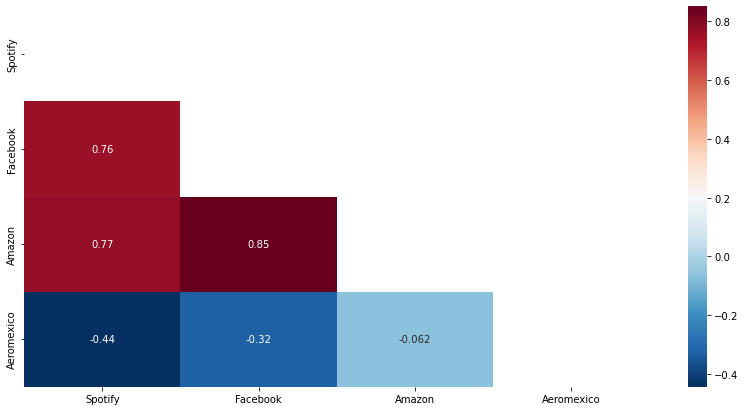

In [37]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(Acciones.corr())
sns.heatmap(Acciones.corr(), cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

In [38]:
Acciones.corr()

,Spotify,Facebook,Amazon,Aeromexico
Spotify,1.000000,0.763988,0.774803,-0.444118
Facebook,0.763988,1.000000,0.851634,-0.323497
Amazon,0.774803,0.851634,1.000000,-0.061689
Aeromexico,-0.444118,-0.323497,-0.061689,1.000000


In [39]:
DataAcciones = yf.download(['SPOT', 'META', 'AMZN', 'AEROMEX.MX'], start='2019-1-1', end='2022-9-6', 
                interval='1d')
DataAcciones

[*********************100%***********************]  4 of 4 completed


Adj Close                                           Close  \
            AEROMEX.MX        AMZN        META        SPOT  AEROMEX.MX   
Date                                                                     
2019-01-02   22.530001   76.956497  135.679993  113.739998   22.530001   
2019-01-03   22.770000   75.014000  131.740005  109.019997   22.770000   
2019-01-04   23.160000   78.769501  137.949997  118.510002   23.160000   
2019-01-07   23.270000   81.475502  138.050003  119.360001   23.270000   
2019-01-08   23.230000   82.829002  142.529999  117.480003   23.230000   
...                ...         ...         ...         ...         ...   
2022-08-30  194.809998  128.729996  157.160004  107.230003  194.809998   
2022-08-31  198.979996  126.769997  162.929993  108.150002  198.979996   
2022-09-01  198.979996  127.820000  165.360001  106.519997  198.979996   
2022-09-02  198.979996  127.510002  160.320007  104.419998  198.979996   
2022-09-05  198.979996         NaN         NaN         NaN  198.979996   

                                                      High              ...  \
                  AMZN        META        SPOT  AEROMEX.MX        AMZN  ...   
Date                                                                    ...   
2019-01-02   76.956497  135.679993  113.739998   23.080000   77.667999  ...   
2019-01-03   75.014000  131.740005  109.019997   23.049999   76.900002  ...   
2019-01-04   78.769501  137.949997  118.510002   23.840000   79.699997  ...   
2019-01-07   81.475502  138.050003  119.360001   24.500000   81.727997  ...   
2019-01-08   82.829002  142.529999  117.480003   23.870001   83.830498  ...   
...                ...         ...         ...         ...         ...  ...   
2022-08-30  128.729996  157.160004  107.230003  194.809998  132.070007  ...   
2022-08-31  126.769997  162.929993  108.150002  199.990005  130.589996  ...   
2022-09-01  127.820000  165.360001  106.519997  198.979996  128.020004  ...   
2022-09-02  127.510002  160.320007  104.419998  198.979996  131.380005  ...   
2022-09-05         NaN         NaN         NaN  198.979996         NaN  ...   

                   Low                    Open                          \
                  META        SPOT  AEROMEX.MX        AMZN        META   
Date                                                                     
2019-01-02  128.559998  110.360001   22.000000   73.260002  128.990005   
2019-01-03  131.119995  108.589996   22.500000   76.000504  134.690002   
2019-01-04  133.750000  111.500000   23.430000   76.500000  134.009995   
2019-01-07  135.910004  113.279999   23.180000   80.115501  137.559998   
2019-01-08  139.539993  114.699997   23.219999   83.234497  139.889999   
...                ...         ...         ...         ...         ...   
2022-08-30  155.910004  105.769997  194.809998  131.250000  160.350006   
2022-08-31  162.139999  107.349998  195.509995  129.449997  167.070007   
2022-09-01  160.350006  102.180000  198.979996  126.000000  163.580002   
2022-09-02  159.220001  103.360001  198.979996  129.500000  167.449997   
2022-09-05         NaN         NaN  198.979996         NaN         NaN   

                           Volume                                      
                  SPOT AEROMEX.MX         AMZN        META       SPOT  
Date                                                                   
2019-01-02  111.660004    54890.0  159662000.0  28146200.0   861100.0  
2019-01-03  112.080002    88098.0  139512000.0  22717900.0  1082300.0  
2019-01-04  112.059998    69569.0  183652000.0  29002100.0  2484800.0  
2019-01-07  115.040001   160120.0  159864000.0  20089300.0  2516200.0  
2019-01-08  121.440002   190421.0  177628000.0  26263800.0  1257100.0  
...                ...        ...          ...         ...        ...  
2022-08-30  110.320000        0.0   49203000.0  19567900.0   951600.0  
2022-08-31  109.500000      789.0   53648700.0  40953000.0  1050400.0  
2022-09-01  106.059998        0.0   5663